In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Let's look at how a bunch of measurements fill out the probability distribution that they're drawn from. Here is the mathematical expression for a Gaussian (or "Normal") distribution.

$Pr(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/(2\sigma^2)}$

First we define a function to quickly and easily find $Pr(x)$ given an center value, $\mu$, and standard deviation, $\sigma$.

In [2]:
def normal_dist(bins, mu=0, sigma=1):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2))

Next I create an array, `xdata`, to hold some x-values, then evaluate the normal function at each of those values.

In [3]:
xdata = np.linspace(-10, 15, 200)
ydata = normal_dist(xdata, mu=3., sigma=4.)

And plot it.

<IPython.core.display.Javascript object>


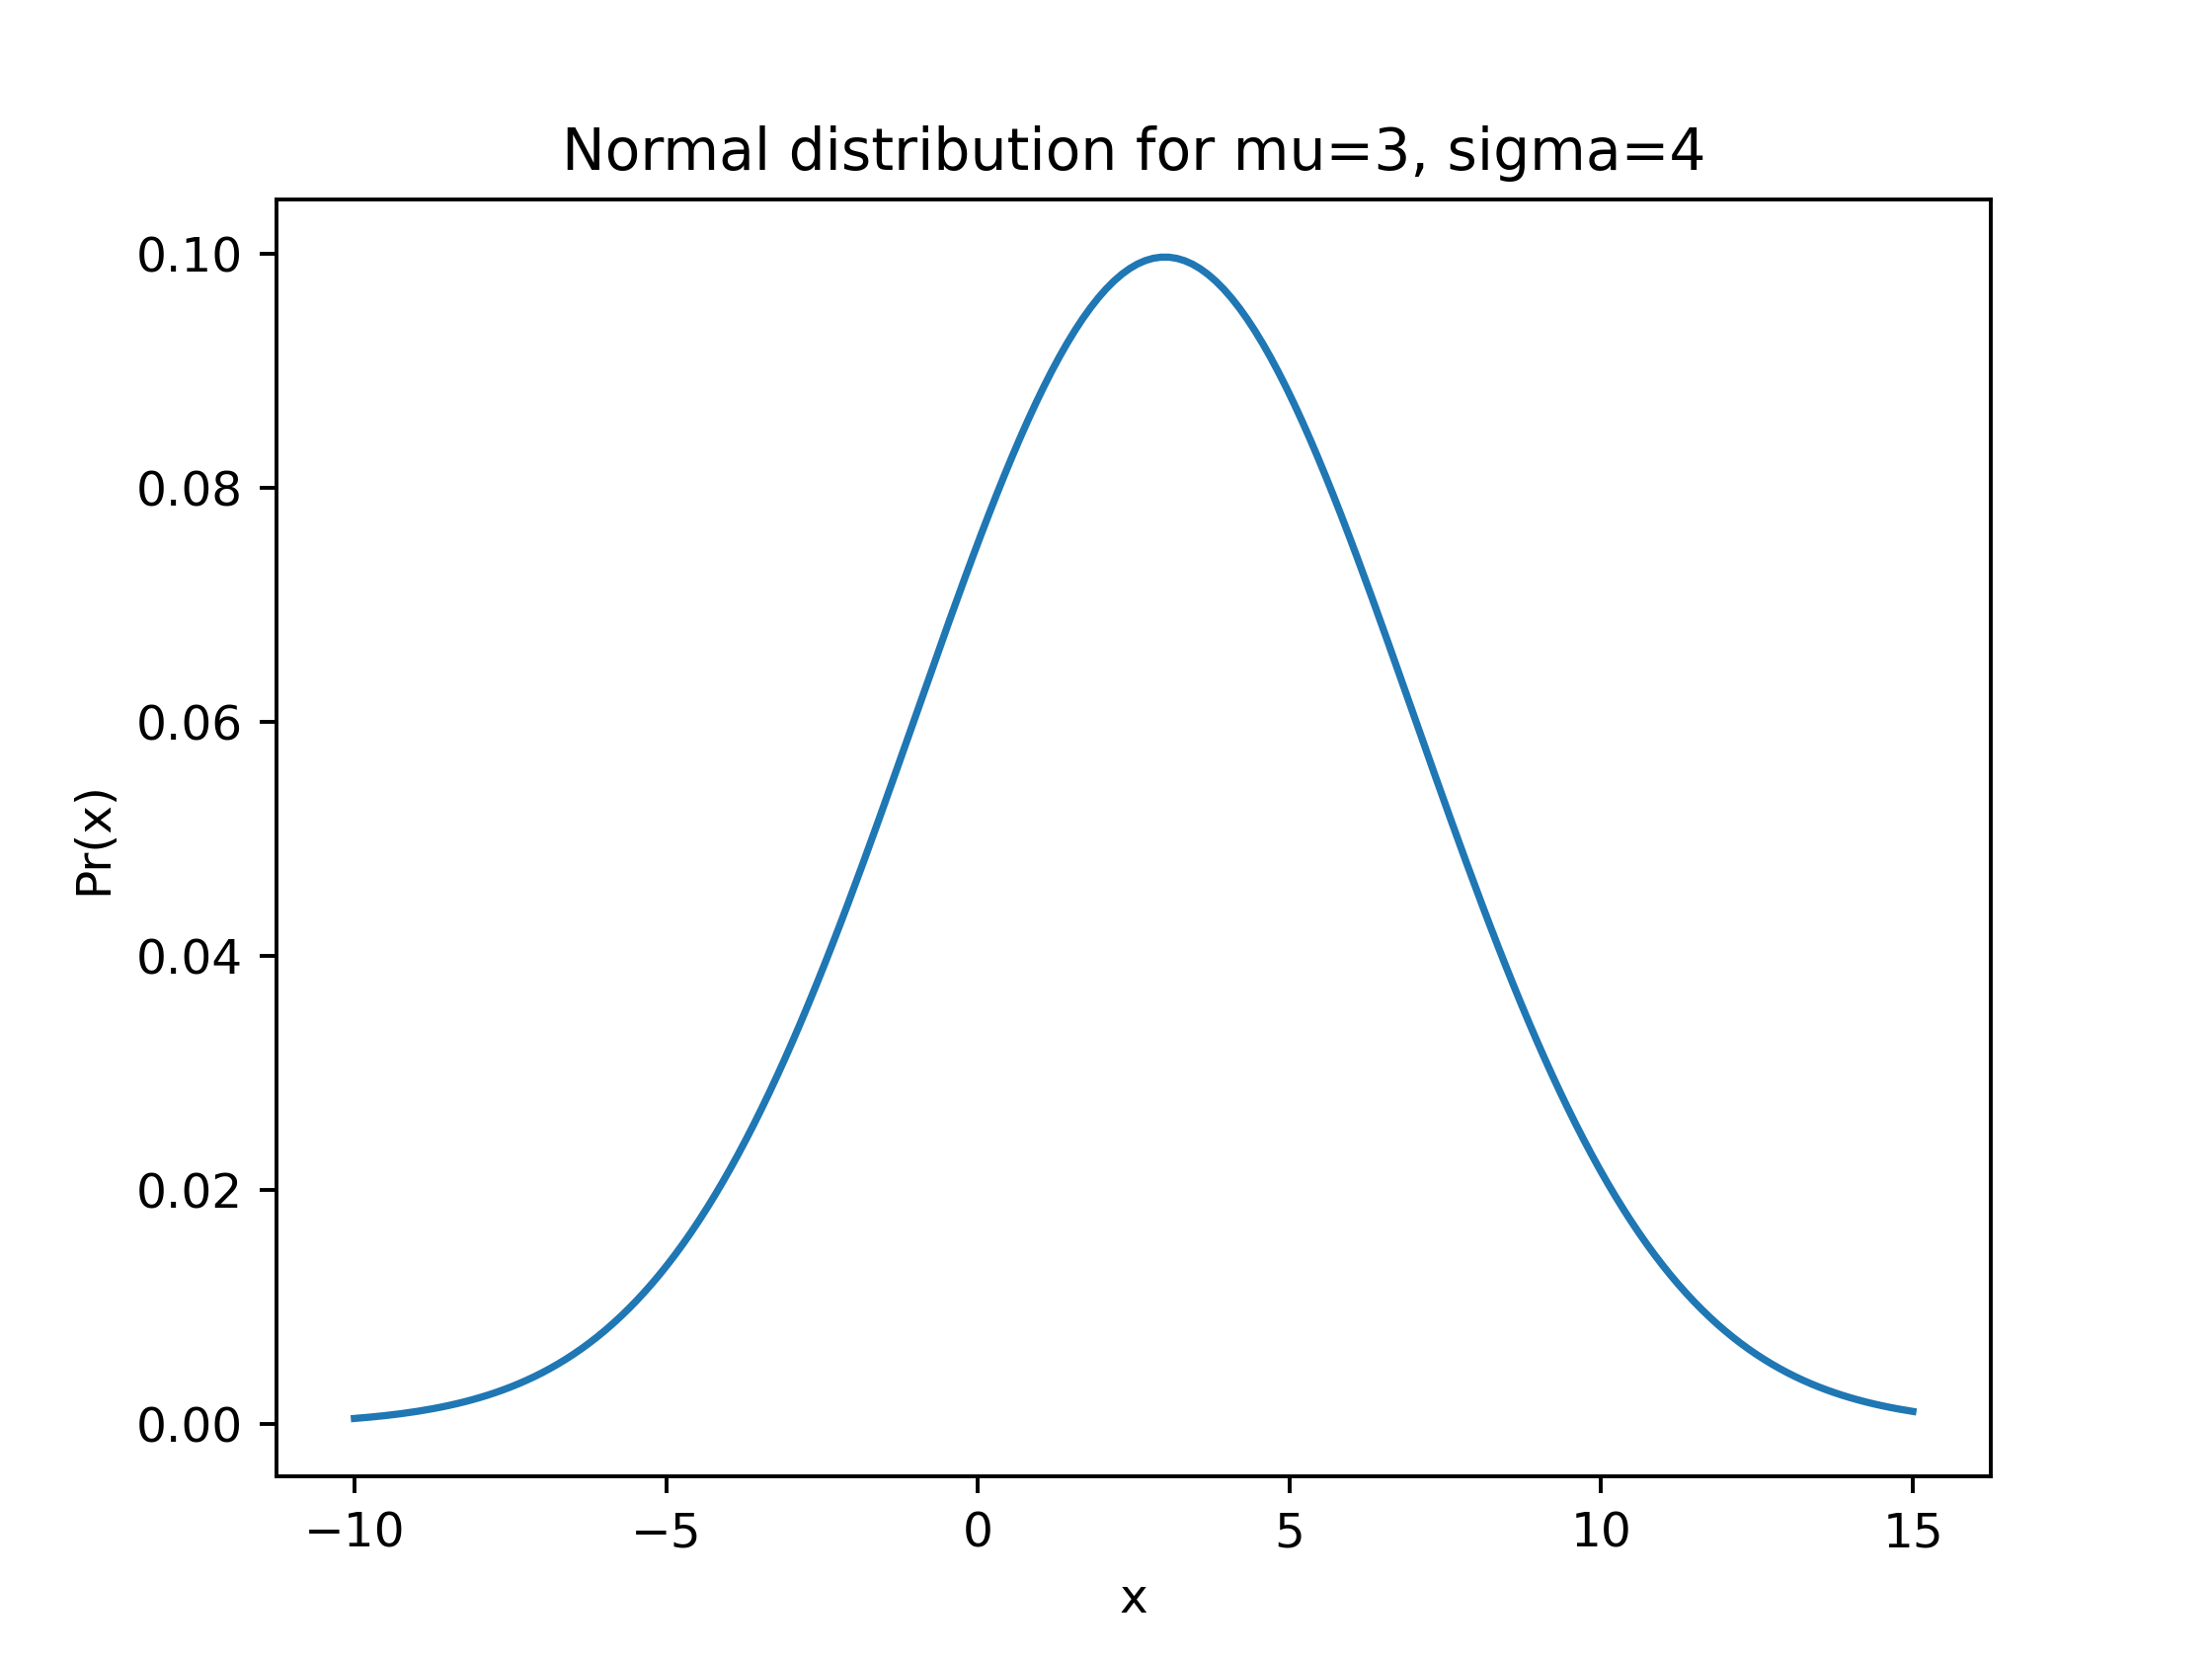

Text(0.5, 1.0, 'Normal distribution for mu=3, sigma=4')

In [4]:
plt.figure()
plt.plot(xdata, ydata)
plt.xlabel('x')
plt.ylabel('Pr(x)')
plt.title('Normal distribution for mu=3, sigma=4')

Now we see what happens when we sample this distribution. Below I walk through sampling and histogramming with $N=1,000$ and $N=50$ so we can compare large and small sample sizes.

In [7]:
mu = 0.5
sigma = 0.1
nsamples1 = 1000
nsamples2 = 50

data1 = np.random.normal(mu, sigma, nsamples1)
data2 = np.random.normal(mu, sigma, nsamples2)

<IPython.core.display.Javascript object>


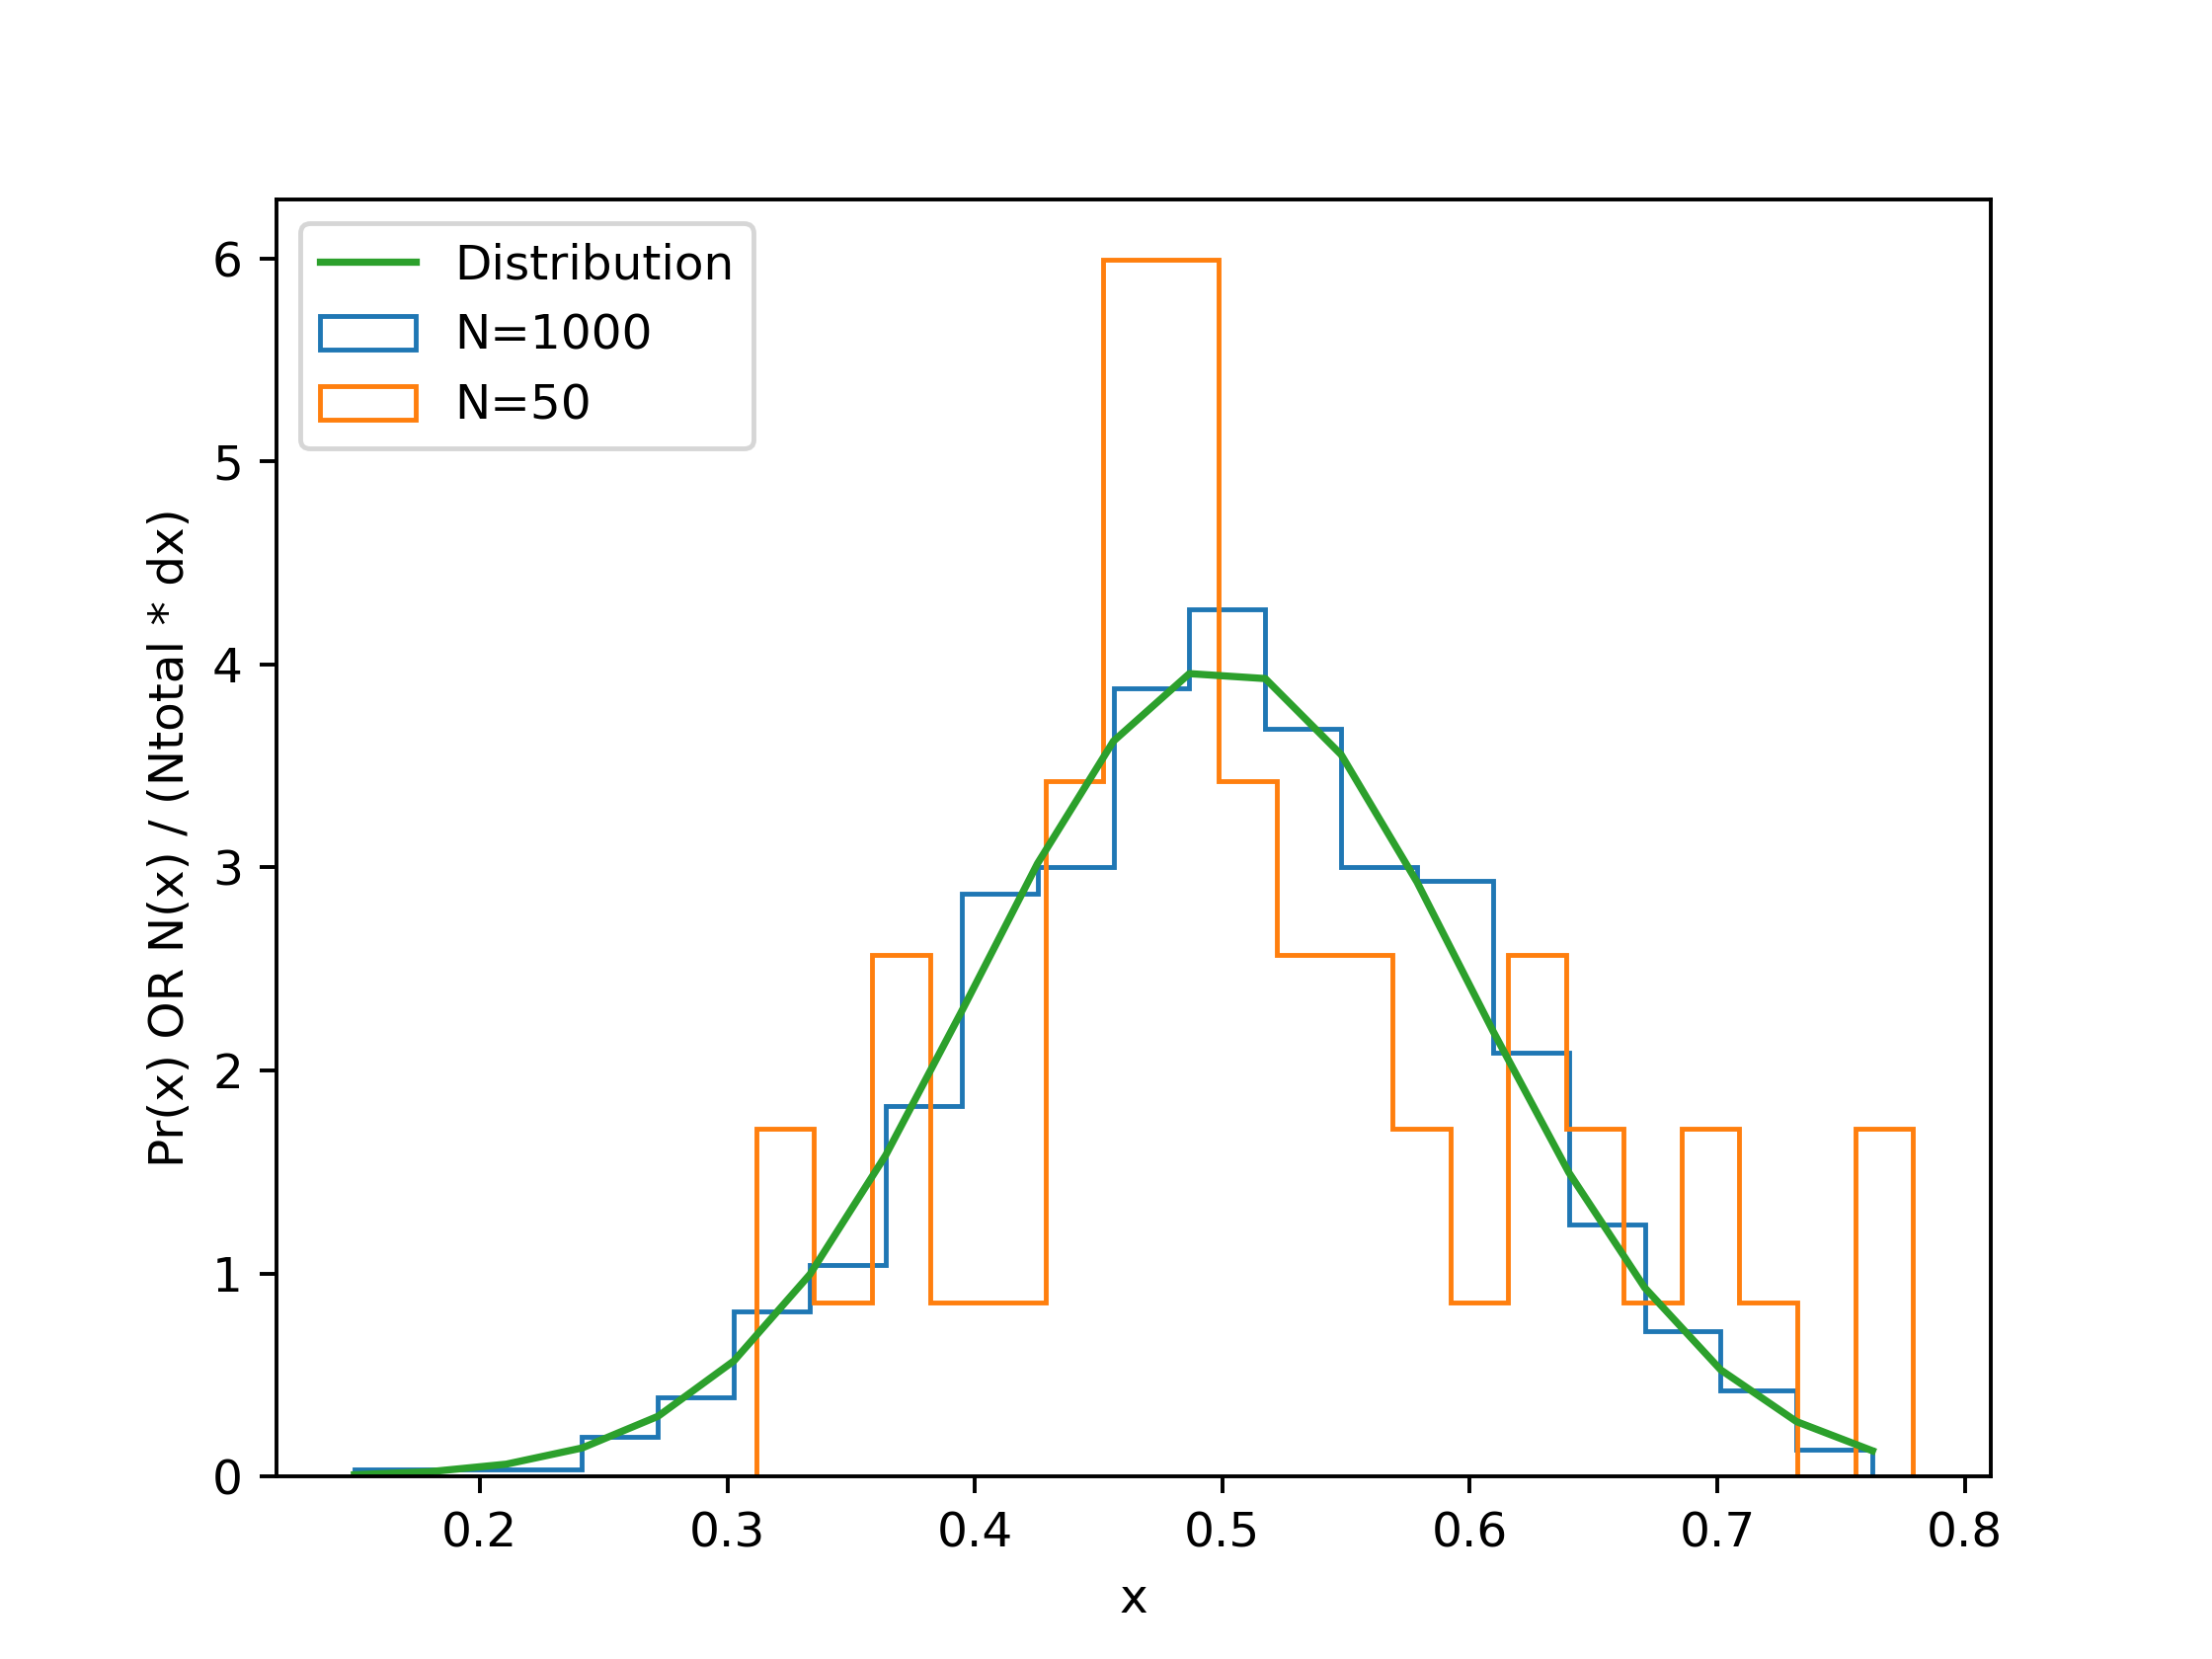

In [8]:
plt.figure()
count1, bins1, ignored1 = plt.hist(data1, 20, density=True, histtype='step', label='N=1000')
count2, bins2, ignored2 = plt.hist(data2, 20, density=True, histtype='step', label='N=50')
plt.plot(bins1, normal_dist(bins1, mu=mu, sigma=sigma), label='Distribution')
plt.xlabel('x')
plt.ylabel('Pr(x) OR N(x) / (Ntotal * dx)')
plt.legend()

Notice the y-axis is a little strange for the samples. It is the number of counts in each bin divided by (total sample size * bin width). This funny scaling ensures the integral over all x is 1 - just like the probability distribution.

You should also see that the two samples look mostly like the underlying distribution, except that the more samples you have, the more closely it follows the distribution.

The more samples you have, the better you understand the distribution, and the better you can estimate $x_{true}$ and the standard deviation.

**But how many samples do you need?**

The next few cells don't have a ton of explanation, they're just there if you're curious. But they walk through doing many trials with a range of sample sizes to get an idea of how accurately you can estimate the underlying distribution.

In [9]:
maxnsample = 100  # Largest sample I will look at here
ntrials = 10000  # Number of "experiments" to run for each sample size
sigma = 3.0  # Gaussian width
pstds = np.zeros(ntrials)  # Array to hold population stds
sstds = np.zeros(ntrials)  # Array to hold sample stds
means = np.zeros(ntrials)  # Array to hold average values
avg_pstds = np.zeros(maxnsample)  # Array for average of the p-stds
avg_sstds = np.zeros(maxnsample)  # Array for average of the s-stds
mstds = np.zeros(maxnsample)  # Array for the std of the mean
sample_array = np.arange(2, maxnsample)

for nsamples in sample_array:
    for i in range(ntrials):
        # Simulate some data
        data = sigma * np.random.randn(nsamples)
        pstds[i] = np.std(data, ddof=0)
        sstds[i] = np.std(data, ddof=1)
        means[i] = np.mean(data)
    avg_pstds[nsamples] = np.mean(pstds)
    avg_sstds[nsamples] = np.mean(sstds)
    mstds[nsamples] = np.std(means)

<IPython.core.display.Javascript object>


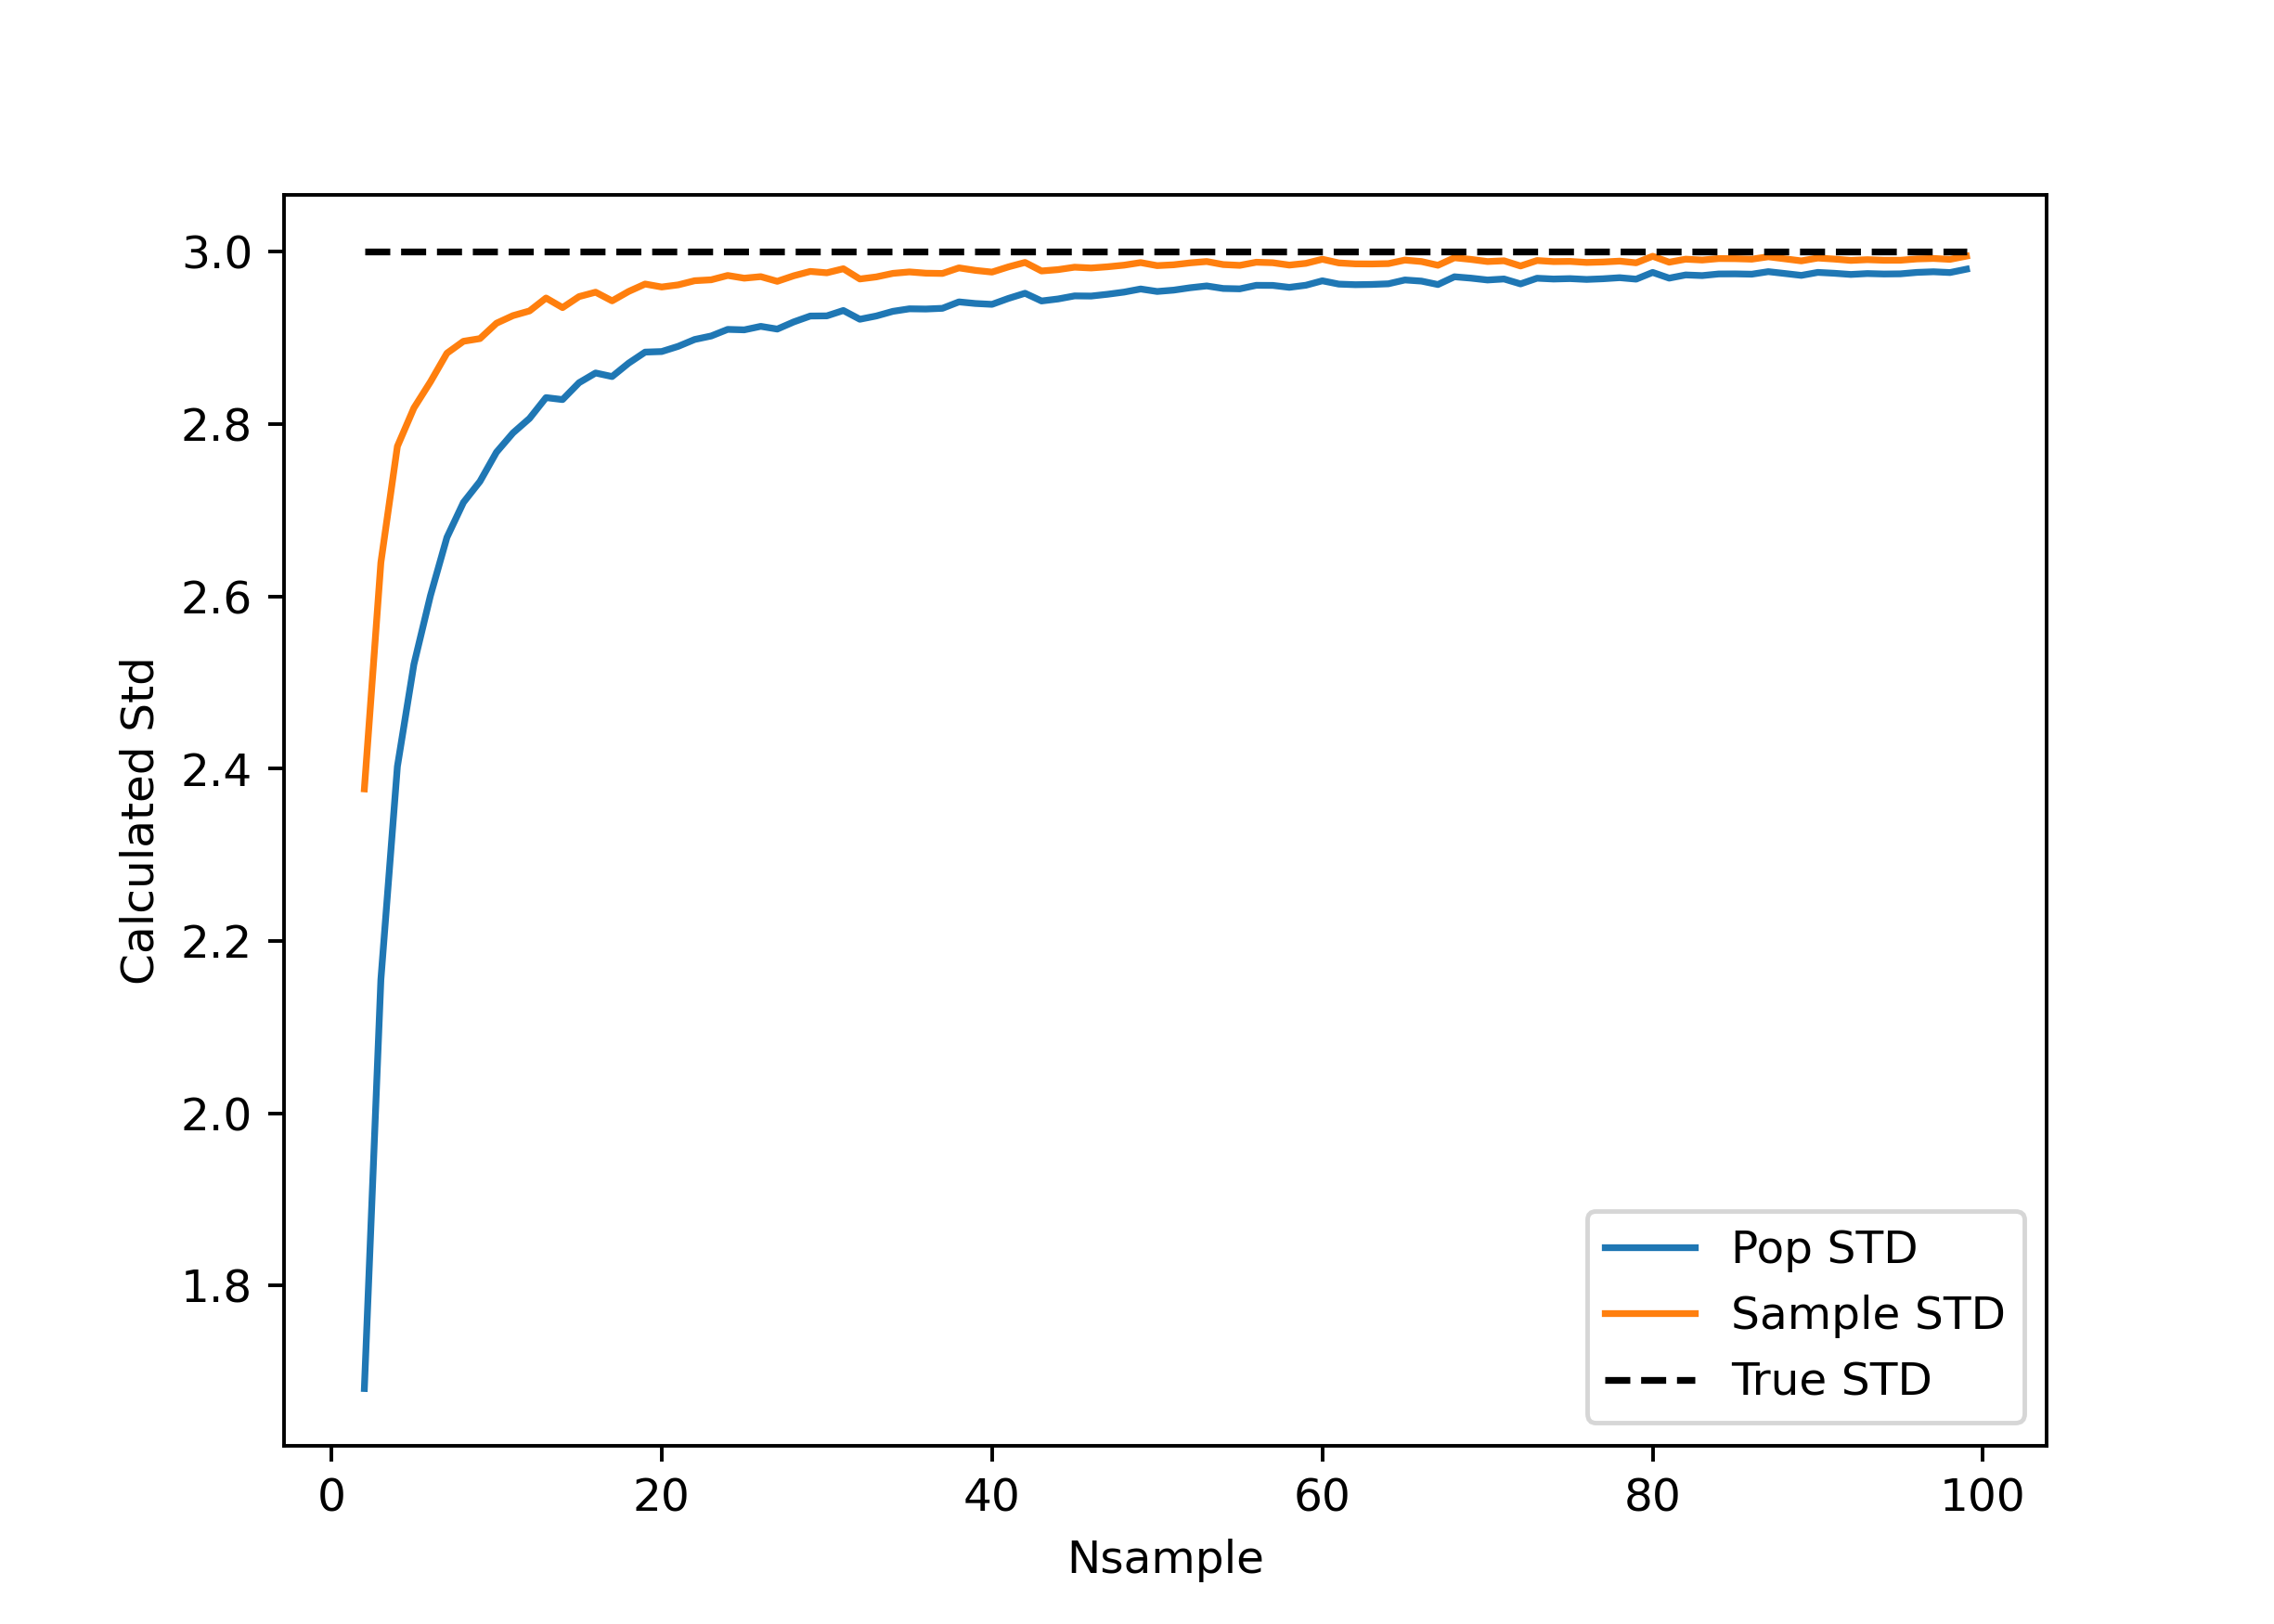

In [11]:
plt.figure(figsize=(7, 5))
plt.plot(sample_array, avg_pstds[2:], label='Pop STD')
plt.plot(sample_array, avg_sstds[2:], label='Sample STD')
plt.plot(sample_array, sigma * np.ones(len(avg_sstds[2:])), '--k', label='True STD')
plt.xlabel('Nsample')
plt.ylabel('Calculated Std')
plt.legend()

We can see above that few samples drastically underestimate the width of the underlying distribution, even if you use the sample STD.

Next let's look at the standard deviation of the mean - both as calulated from the standard deviations and dividing by $\sqrt{N}$, and as "measured."

<IPython.core.display.Javascript object>


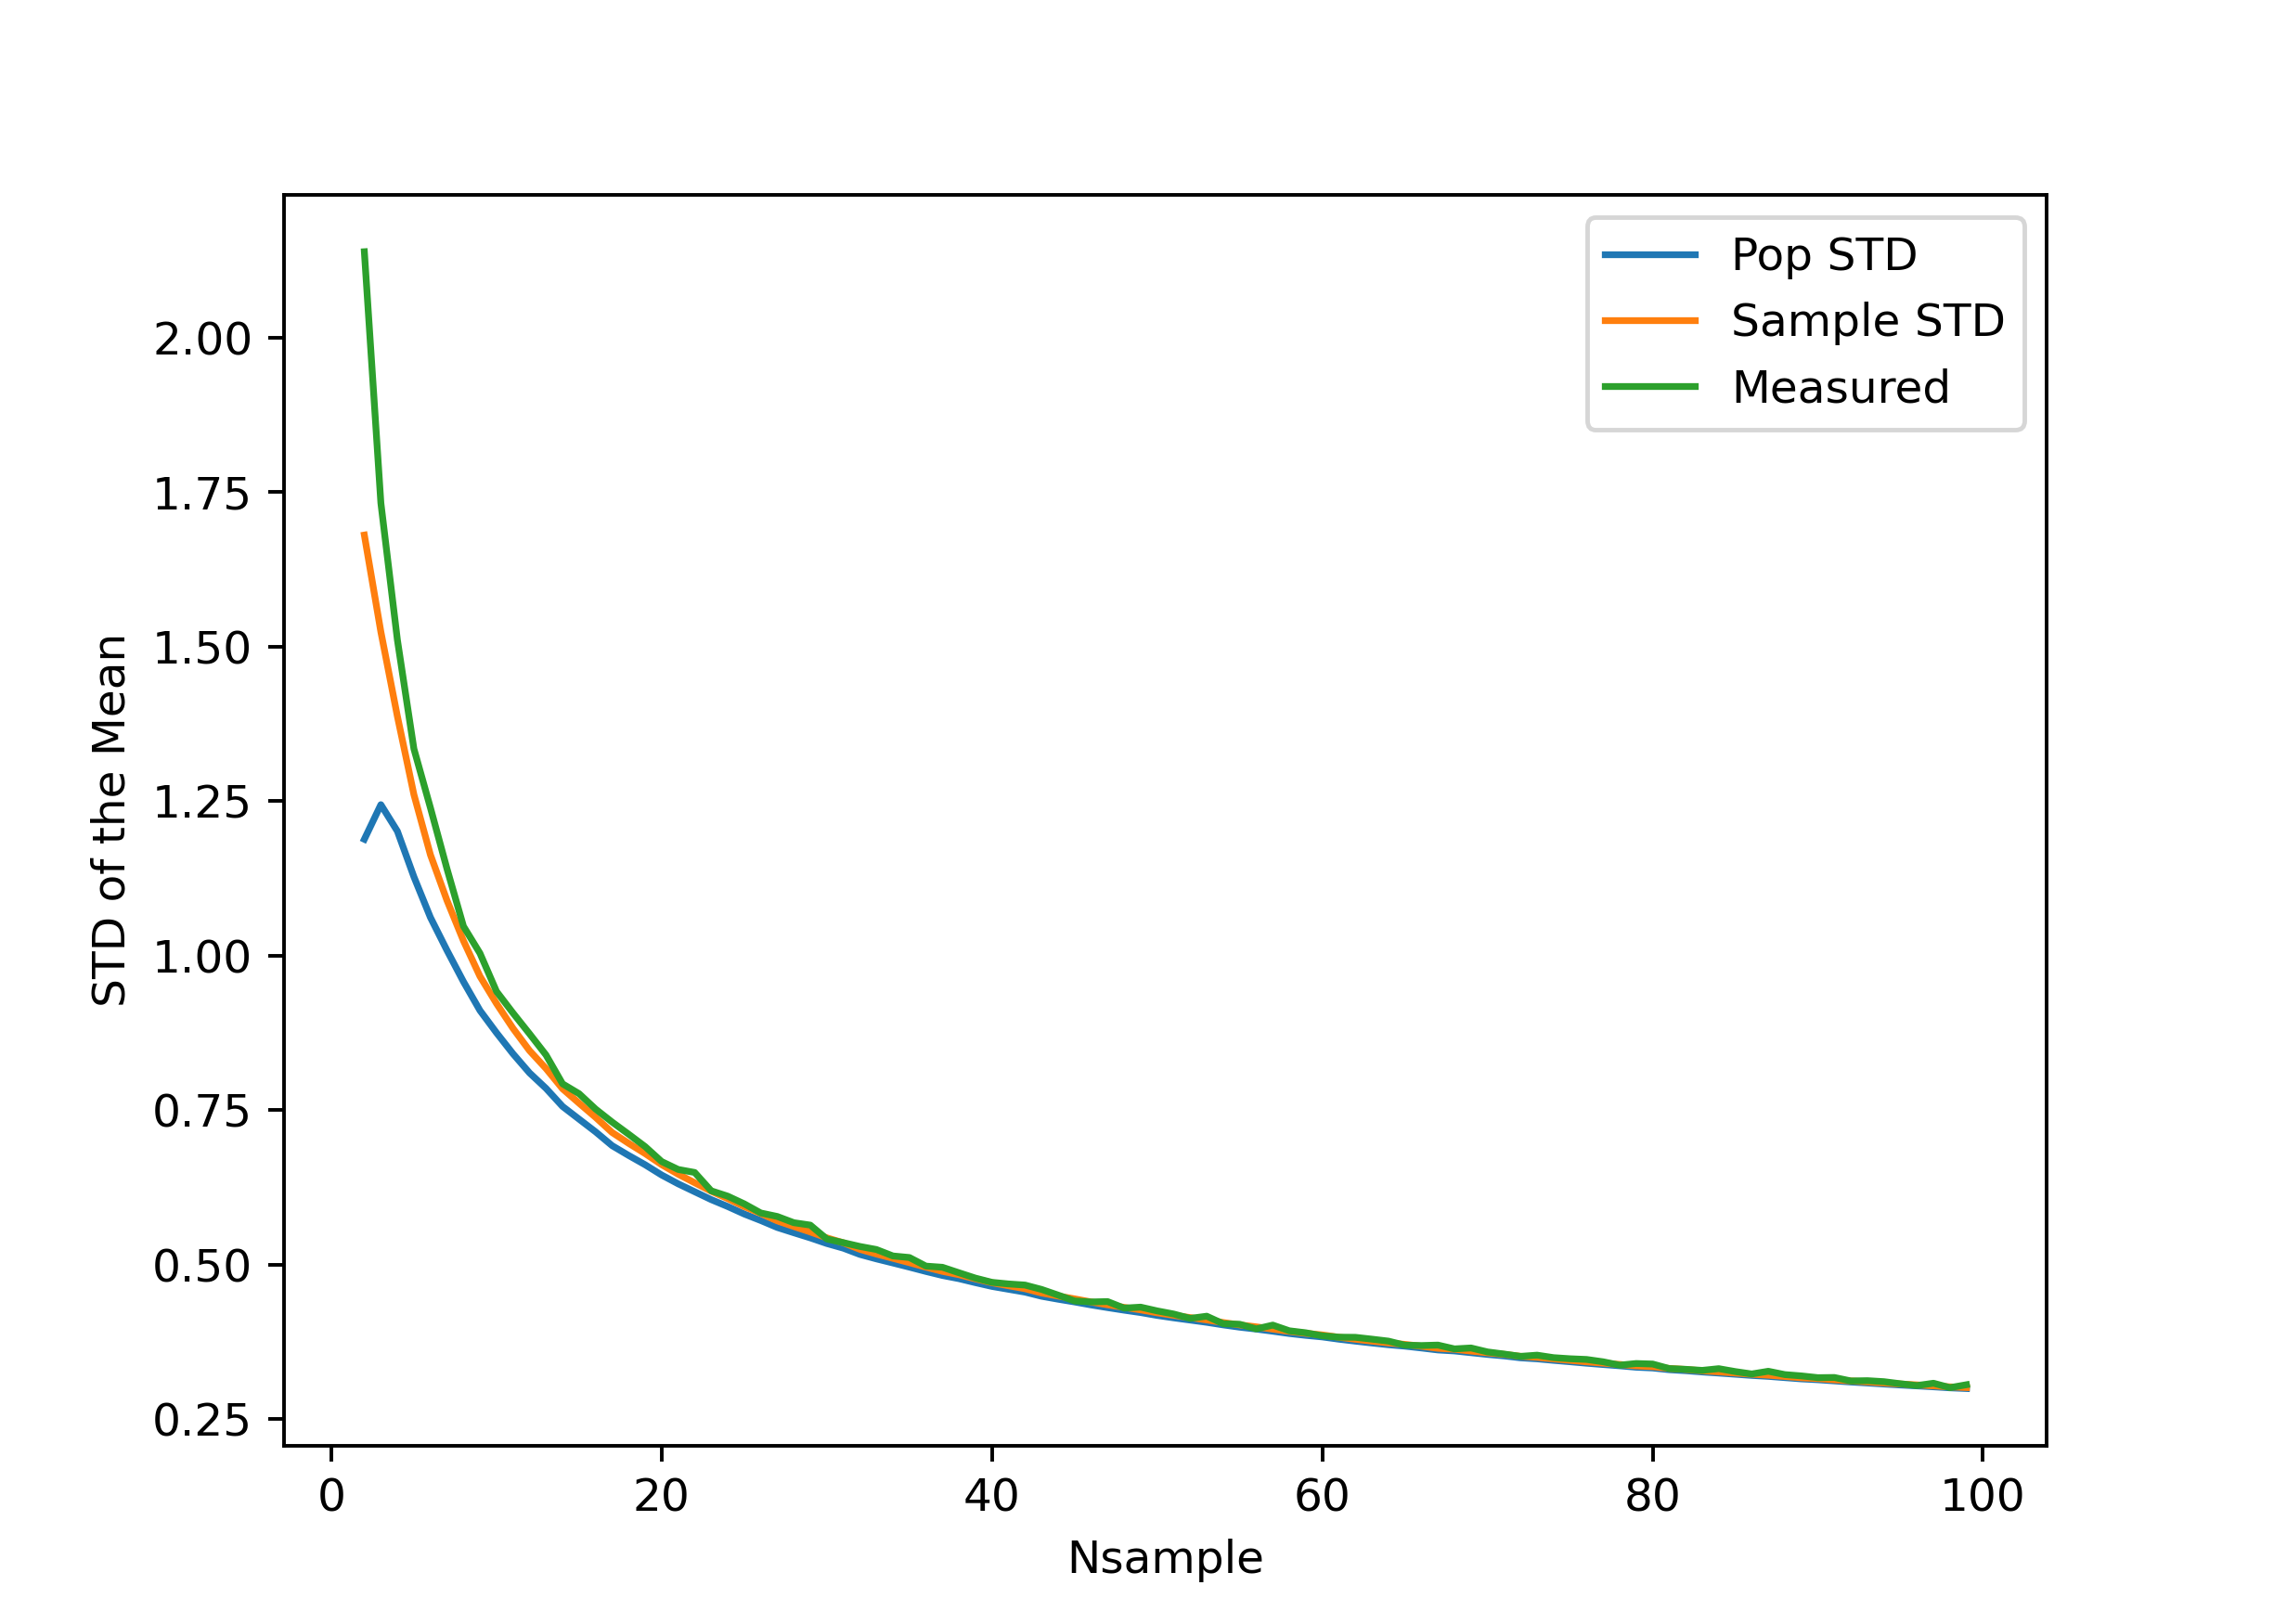

In [12]:
plt.figure(figsize=(7, 5))
plt.plot(sample_array, avg_pstds[2:] / np.sqrt(sample_array), label='Pop STD')
plt.plot(sample_array, avg_sstds[2:] / np.sqrt(sample_array), label='Sample STD')
plt.plot(sample_array, mstds[2:], label='Measured')
plt.xlabel('Nsample')
plt.ylabel('STD of the Mean')
plt.legend()

Here again we see how the sample STD better matches reality, but even it has its shortfalls for low-N. Once you have measured ~10-20 samples, you can be confidenct in your uncertainty.